# Hypothesis 4: The exoneration rate for murder in Eastern states relative to total state population is predicted to be lower than the average of Western states.

${H_0}: \textrm{The exoneration rate for murder (exoneration count/population) for Eastern states is the same or higher than the exoneration rate for murder in other states.}$
${H_\alpha}: \textrm{The exoneration rate for murder (exoneration count/population) for Eastern is lower than the exoneration rate for murder in other states.}$

$\alpha = 0.05$

### Method

t-test

In [5]:
import requests
import pandas as pd
import pickle
import re
import seaborn as sns
sns.set_style('darkgrid')
from scipy import stats
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Load in and preview first dataset, 'prison_custody_by_state.csv'
# This data includes year-end prison custody totals by state as reported by the Bureau of 
# Justice Statistics' National Prisoner Statistics Program. Federal row reflects Bureau of Prison custody totals.

df1 = pd.read_csv('prison_custody_by_state.csv')
df1.head()

,jurisdiction,includes_jails,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Federal,0,"149,852","158,216","168,144","177,600","186,364","190,844","197,285","198,414","205,087","206,968","214,774","216,915","214,989","209,561","195,622","188,311"
1,Alabama,0,"24,741","25,100","27,614","25,635","24,315","24,103","25,253","25,363","27,241","27,345","26,813","26,768","26,825","26,145","25,212","23,745"
2,Alaska,1,"4,570","4,351","4,472","4,534","4,798","5,052","5,151","4,997","5,472","5,369","6,216","6,308","5,081","6,323","5,247","4,378"
3,Arizona,0,"27,710","29,359","31,084","32,384","33,345","35,752","37,700","39,455","40,544","40,130","39,949","40,013","41,031","42,136","42,204","42,248"
4,Arkansas,0,"11,489","11,849","12,068","12,577","12,455","12,854","13,275","13,135","13,338","14,192","14,090","14,043","14,295","15,250","15,784","15,833"


In [3]:
# Remove commas from data and convert strings into integers

cols_to_remove_commas = df1.columns[2:]
df1[cols_to_remove_commas] = df1[cols_to_remove_commas].replace({',':''}, regex=True).astype(int)
df1.head()

,jurisdiction,includes_jails,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Federal,0,149852,158216,168144,177600,186364,190844,197285,198414,205087,206968,214774,216915,214989,209561,195622,188311
1,Alabama,0,24741,25100,27614,25635,24315,24103,25253,25363,27241,27345,26813,26768,26825,26145,25212,23745
2,Alaska,1,4570,4351,4472,4534,4798,5052,5151,4997,5472,5369,6216,6308,5081,6323,5247,4378
3,Arizona,0,27710,29359,31084,32384,33345,35752,37700,39455,40544,40130,39949,40013,41031,42136,42204,42248
4,Arkansas,0,11489,11849,12068,12577,12455,12854,13275,13135,13338,14192,14090,14043,14295,15250,15784,15833


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


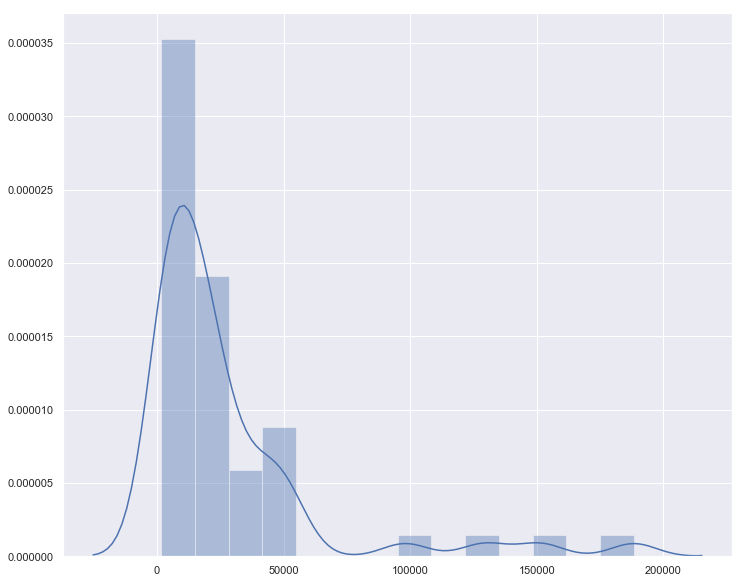

In [7]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(df1["2016"].values)

In [110]:
# Load in and preview first dataset, 'prison_custody_by_state.csv'
# This data includes year-end prison custody totals by state as reported by the Bureau of 
# Justice Statistics' National Prisoner Statistics Program. Federal row reflects Bureau of Prison custody totals.
# https://www.law.umich.edu/special/exoneration/Pages/glossary.aspx

df2 = pd.read_excel('NIJ_exonerations.xlsx')
df2.head()

,Last Name,First Name,Age,Race,Sex,State,County,Tags,Worst Crime Display,List Add'l Crimes Recode,...,DNA,*,FC,MWID,F/MFE,P/FA,OM,ILD,Posting Date,ID
0,Abbitt,Joseph Lamont,31.0,Black,Male,North Carolina,Forsyth,CV;#IO,Child Sex Abuse,Sexual Assault;#Kidnapping;#Burglary/Unlawful ...,...,DNA,NaN,NaN,MWID,NaN,NaN,NaN,NaN,2011-09-01,3807
1,Abdal,Warith Habib,43.0,Black,Male,New York,Erie,IO,Sexual Assault,Robbery,...,DNA,NaN,NaN,MWID,F/MFE,NaN,OM,NaN,2011-08-29,2978
2,Abernathy,Christopher,17.0,White,Male,Illinois,Cook,CIU;#CV;#H;#IO,Murder,Rape;#Robbery,...,DNA,NaN,FC,NaN,NaN,P/FA,OM,NaN,2015-02-13,4640
3,Abney,Quentin,32.0,Black,Male,New York,New York,CV,Robbery,NaN,...,NaN,NaN,NaN,MWID,NaN,NaN,NaN,NaN,2019-05-13,5553
4,Acero,Longino,35.0,Hispanic,Male,California,Santa Clara,NC;#P,Sex Offender Registration,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ILD,2011-08-29,2979


In [10]:
states_list = ['Alaska','Alabama','Arkansas','Arizona','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii', 'Iowa','Idaho','Illinois','Indiana', 'Kansas','Kentucky','Louisiana', 'Massachusetts', 'Maryland','Maine', 'Michigan','Minnesota', 'Missouri','Mississippi', 'Montana', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']
state_abbrevs = ['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']
state_dict = dict(zip(states_list, state_abbrevs))

In [225]:
eastern_states = ['Maine',
'Vermont',
'New Hampshire',
'Massachusetts',
'Rhode Island',
'Connecticut',
'New York',
'New Jersey',
'Pennsylvania',
'Delaware',
'Maryland',
'West Virginia',
'Virginia',
'North Carolina',
'South Carolina',
'Tennessee',
'Ohio',
'Indiana',
'Michigan',
'Illinois',
'Wisconsin',
'Georgia',
'Alabama',
'Mississippi',
'Kentucky']
eastern_state_abbrevs = ['ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'WV', 'VA', 'NC', 'SC', 'TN', 'OH', 'IN', 'MI', 'IL', 'WI', 'GA', 'AL', 'MS', 'KY']

In [111]:
df2['State'] = df2['State'].map(state_dict)

In [12]:
df2

,Last Name,First Name,Age,Race,Sex,State,County,Tags,Worst Crime Display,List Add'l Crimes Recode,...,DNA,*,FC,MWID,F/MFE,P/FA,OM,ILD,Posting Date,ID
0,Abbitt,Joseph Lamont,31.0,Black,Male,NC,Forsyth,CV;#IO,Child Sex Abuse,Sexual Assault;#Kidnapping;#Burglary/Unlawful ...,...,DNA,NaN,NaN,MWID,NaN,NaN,NaN,NaN,2011-09-01,3807
1,Abdal,Warith Habib,43.0,Black,Male,NY,Erie,IO,Sexual Assault,Robbery,...,DNA,NaN,NaN,MWID,F/MFE,NaN,OM,NaN,2011-08-29,2978
2,Abernathy,Christopher,17.0,White,Male,IL,Cook,CIU;#CV;#H;#IO,Murder,Rape;#Robbery,...,DNA,NaN,FC,NaN,NaN,P/FA,OM,NaN,2015-02-13,4640
3,Abney,Quentin,32.0,Black,Male,NY,New York,CV,Robbery,NaN,...,NaN,NaN,NaN,MWID,NaN,NaN,NaN,NaN,2019-05-13,5553
4,Acero,Longino,35.0,Hispanic,Male,CA,Santa Clara,NC;#P,Sex Offender Registration,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ILD,2011-08-29,2979
5,Adams,Anthony,26.0,Hispanic,Male,CA,Los Angeles,H;#P,Manslaughter,NaN,...,NaN,NaN,NaN,NaN,NaN,P/FA,OM,NaN,2012-05-18,3895
6,Adams,Cheryl,26.0,White,Female,MA,Essex,F;#NC;#P,Theft,NaN,...,NaN,NaN,NaN,NaN,NaN,P/FA,NaN,NaN,2014-10-28,4536
7,Adams,Darryl,25.0,Black,Male,TX,Dallas,CIU;#IO;#NC;#P,Sexual Assault,NaN,...,DNA,*,NaN,NaN,NaN,P/FA,NaN,NaN,2017-02-18,5089
8,Adams,Don Ray,32.0,Black,Male,PA,Philadelphia,H,Murder,NaN,...,NaN,NaN,NaN,NaN,NaN,P/FA,OM,NaN,2012-03-13,3880
9,Adams,Jarrett M.,17.0,Black,Male,WI,Jefferson,IO;#NC,Sexual Assault,NaN,...,NaN,NaN,NaN,NaN,NaN,P/FA,NaN,ILD,2011-08-29,2980


In [112]:
# make sure to go back and check this number... 2016 vs all. Total may be more interesting because paucity of data

exoneration_counts = pd.value_counts(df2['State'].values)
exoneration_counts

TX    357
IL    296
NY    259
CA    194
MI     95
OH     80
FL     72
PA     70
MA     65
NC     61
LA     57
WI     55
VA     52
WA     49
MO     46
NJ     38
GA     37
IN     36
OK     35
MD     33
AL     27
CT     23
MS     21
TN     21
AZ     20
OR     19
UT     16
IA     15
MN     15
KY     15
MT     14
NV     13
KS     10
CO     10
WV     10
AR     10
NE      9
AK      8
SC      7
NM      7
RI      6
SD      5
ID      5
ND      4
WY      4
ME      3
HI      3
DE      3
VT      2
NH      1
dtype: int64

In [113]:
exoneration_counts = pd.DataFrame(exoneration_counts)

In [114]:
exoneration_counts = exoneration_counts.reset_index(inplace=True)

AttributeError: 'NoneType' object has no attribute 'rename'

In [117]:
exoneration_counts = exoneration_counts.rename(index=str, columns={'index':'State', 0:'Exonerations'})

In [35]:
# Get population data from H2
dbfile = open('populationDB', 'rb')
pop_data_2016 = pickle.load(dbfile)
dbfile.close()

In [135]:
pop_data_2016

,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017
1,AL,4779736,4780135,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747
2,AK,710231,710249,714015,722259,730825,736760,736759,737979,741522,739795
3,AZ,6392017,6392309,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270
4,AR,2915918,2916031,2921737,2938640,2949208,2956780,2964800,2975626,2988231,3004279
5,CA,37253956,37254518,37327690,37672654,38019006,38347383,38701278,39032444,39296476,39536653
6,CO,5029196,5029325,5048029,5116411,5186330,5262556,5342311,5440445,5530105,5607154
7,CT,3574097,3574114,3580171,3591927,3597705,3602470,3600188,3593862,3587685,3588184
8,DE,897934,897936,899712,907884,916868,925114,934805,944107,952698,961939
10,FL,18801310,18804594,18846461,19097369,19341327,19584927,19897747,20268567,20656589,20984400
11,GA,9687653,9688690,9712696,9810595,9911171,9981773,10083850,10199533,10313620,10429379


In [50]:
state_pop_2016 = pop_data_2016[['Geography', 'Population Estimate (as of July 1) - 2016']]

In [130]:
state_pop_2016.rename(columns={'Geography':'State'}, inplace=True)

In [133]:
merged = pd.merge(exoneration_counts, state_pop_2016, on='State')

In [139]:
merged

,State,Exonerations,Population Estimate (as of July 1) - 2016
0,TX,357,27904862
1,IL,296,12835726
2,NY,259,19836286
3,CA,194,39296476
4,MI,95,9933445
5,OH,80,11622554
6,FL,72,20656589
7,PA,70,12787085
8,MA,65,6823721
9,NC,61,10156689


In [144]:
merged['Ex_per_capita'] = merged['Exonerations']/merged['Population Estimate (as of July 1) - 2016']

In [145]:
merged

,State,Exonerations,Population Estimate (as of July 1) - 2016,Ex_per_capita
0,TX,357,27904862,1.279347e-05
1,IL,296,12835726,2.306064e-05
2,NY,259,19836286,1.305688e-05
3,CA,194,39296476,4.936829e-06
4,MI,95,9933445,9.563651e-06
5,OH,80,11622554,6.883169e-06
6,FL,72,20656589,3.485571e-06
7,PA,70,12787085,5.474273e-06
8,MA,65,6823721,9.525595e-06
9,NC,61,10156689,6.005894e-06


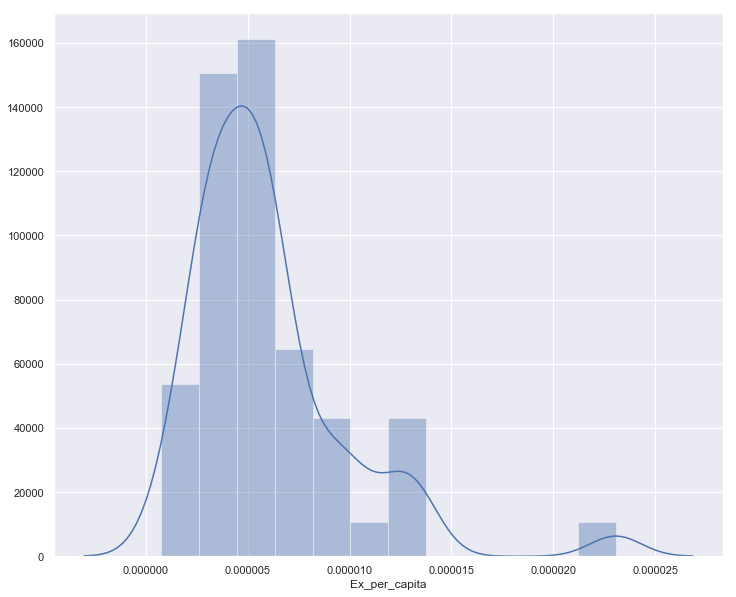

In [149]:
sns.distplot(merged['Ex_per_capita'], kde=True)

### Statistical analysis: Confidence interval

In [241]:
eastern_data = pd.DataFrame()
for state in eastern_state_abbrevs:
    stateregex = re.compile(state)
    state_match = merged[merged['State'].str.match(stateregex) == True]
    print(state_match)
    eastern_data = eastern_data.append(state_match)

   State  Exonerations  Population Estimate (as of July 1) - 2016  \
45    ME             3                                    1330232   

    Ex_per_capita  
45       0.000002  
   State  Exonerations  Population Estimate (as of July 1) - 2016  \
48    VT             2                                     623354   

    Ex_per_capita  
48       0.000003  
   State  Exonerations  Population Estimate (as of July 1) - 2016  \
49    NH             1                                    1335015   

    Ex_per_capita  
49   7.490553e-07  
  State  Exonerations  Population Estimate (as of July 1) - 2016  \
8    MA            65                                    6823721   

   Ex_per_capita  
8        0.00001  
   State  Exonerations  Population Estimate (as of July 1) - 2016  \
40    RI             6                                    1057566   

    Ex_per_capita  
40       0.000006  
   State  Exonerations  Population Estimate (as of July 1) - 2016  \
21    CT            23                  

In [245]:
# DataFrame for 25 Eastern states
eastern_data

,State,Exonerations,Population Estimate (as of July 1) - 2016,Ex_per_capita
45,ME,3,1330232,2.255246e-06
48,VT,2,623354,3.208450e-06
49,NH,1,1335015,7.490553e-07
8,MA,65,6823721,9.525595e-06
40,RI,6,1057566,5.673405e-06
21,CT,23,3587685,6.410819e-06
2,NY,259,19836286,1.305688e-05
15,NJ,38,8978416,4.232372e-06
7,PA,70,12787085,5.474273e-06
47,DE,3,952698,3.148952e-06


In [258]:
other_data = merged[~eastern_data]

TypeError: bad operand type for unary ~: 'str'

In [254]:
east_data = np.asarray(eastern_data['Ex_per_capita'])
other_data = merged.drop([2])['Ex_per_capita'].values

In [259]:
print('Eastern mean: ' + str(east_data.mean()))

Eastern mean: 6.218222327035234e-06


In [188]:
print('Other mean: ' + str(other_data.mean()))

Other mean: 5.870683482628418e-06


In [207]:
sample_size = 48 #49 other states
t_critical = stats.t.ppf(q = 0.975, df=sample_size-1)  # Get the t-critical value
print(f'The t critical value is {round(t_critical, 2)}.')

The t critical value is 2.01.


In [208]:
sample_stdev = other_data.std()
print(f'The sample standard deviation is {sample_stdev}.')

The sample standard deviation is 3.800908126824736e-06.


In [209]:
margin_of_error = t_critical * sigma
print(f'margin of error = {margin_of_error}.')

margin of error = 1.0923486936185484e-06.


In [210]:
confidence_interval = (other_data.mean() - margin_of_error,
                       other_data.mean() + margin_of_error)  
print("Confidence interval:")
print(confidence_interval)

Confidence interval:
(4.77833478900987e-06, 6.963032176246967e-06)


In [212]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 48,                    # Degrees of freedom
                 loc = other_data.mean(),   # Sample mean
                 scale = sigma)             # Standard deviation estimate

(4.778935199885279e-06, 6.962431765371558e-06)